<a href="https://colab.research.google.com/github/aditimahabole/ML_NLP_Depression_Prediction_Tweets/blob/main/ml_nlp_pbl_sem7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install nltk

In [13]:
pip install pandas

In [30]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Depression Detection Analysis**

Libraries

In [14]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

Loading Training Data

In [16]:
data = pd.read_csv("/content/train.csv")
print(data.sample(3))

                 PID                                          Text_data  \
5224  train_pid_5225  I opened up about my Problems and got insulted...   
3453  train_pid_3454  Fuck you 2019, what a shitty year : I’ve reall...   
547    train_pid_548  Was having a shit day before I even realized i...   

         Label  
5224  moderate  
3453  moderate  
547   moderate  


Independent X and dependent y Features

In [17]:
X = data['Text_data']
y = data['Label']

Showing some training data

In [32]:
print("-----------------------------------------------")
for i in range(0,6):
  print(X[i],end="\n")
print("-----------------------------------------------")

-----------------------------------------------
waiting mind breakdown new year feeling anymore know anyone else little bit worried go back depressed day time something last year tried breakdown start mere day later broke cry entire year december ok month wait weird way act feel feel bit normal
new year resolution gonna get as therapist office dont become even little bit happy dealing shit anymore asking lot little bit serotonin want
new year somone else feeling like last year earth even wen hammerd feeling like moron thats depressed
story guess hi im germany english mostly self learned please excuse anything wrong go depressed year one real life talk thought post story start year old best friend talking shit telling fake friend without anything reason still best friend changed luckily original cause depression never told anyone family tho thing started get normal suffered serious trust issue also made socially awkward since cant talk new people without swetting stressed general find n

In [19]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

Function for cleaning data

In [20]:
def clean_data(X):
  corpus = []
  lemmatizer = WordNetLemmatizer()
  for i in range(0,len(X)):
    sentence = re.sub('[^a-zA-Z]',' ',X[i])
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [re.sub('[^a-zA-Z]',' ',word) for word in sentence]
    sentence = [lemmatizer.lemmatize(word) for word in sentence if word not in stopwords.words('english')]
    sentence = ' '.join(sentence)
    corpus.append(sentence)
  return corpus

Naive Bayes Classifier

In [55]:
class Naive_Bayes_Classifier:
  # Constructor
  def __init__(self):
    self.class_prob = {} # P(class)
    self.word_prob = {}  # P(word | class)
    self.total_classes = len(y)
    self.vocabulary = set()



  # Fit data function
  def fit_data(self,X,y):
    count_of_class = {} # har class me kitne words hai yaha store kar rhe
    class_samples = len(y)
    for label in y:
      if label in count_of_class:
        count_of_class[label] += 1 #for duplicates
      else:
        count_of_class[label] = 1 # whenever new word comes
    print("-------------Total Classes--------------")
    print(self.total_classes,end="\n")
    print("----------COUNT OF CLASS-----------")
    result = list(count_of_class.items())[:5]
    print(result)

    # Calculating probabilities of each class
    for label , count in count_of_class.items():
      print("label  = "+str(label)+" |  count = "+str(count),end="\n")
      self.class_prob[label] = count/self.total_classes
    print("---------CLASS PROBABILITY-----------")
    print(self.class_prob,end="\n")

    # Distinct classes
    distinct_classes = set(y)
    print("----Distinct Classes----")
    print(distinct_classes,end="\n")
    # Vocabulary
    for sen in X:
      for word in sen.split():
        self.vocabulary.add(word)
    print(f"----Vocabulary----\n")
    print(self.vocabulary)
    print(f"----Vocabulary Length----\n")
    print(len(self.vocabulary))
    # Calculating probabilities of words w.r.t each class
    for topic in distinct_classes:
      self.word_prob[topic] = {}
      # Storing the words that belong to topic
      class_words = []
      for text , label in zip(X,y):
        if label == topic:
          for word in text.split():
            class_words.append(word)
      print("========Class Words=========")
      print(class_words[0:10])
      total_words = len(class_words)
      # Counting the word frequencies
      word_counts = {}
      #{ word:count}
      for word in class_words:
          if word in word_counts:
              word_counts[word] += 1
          else:
              word_counts[word] = 1

      vocabulary_len = len(self.vocabulary)
      # formula = (C(word| class) + 1 ) / (C(class) + |V|)
      # Applying Naive Bayes formula
      for w in word_counts:
        word_freq = word_counts[w]
        numerator = word_freq + 1 # Laplase smoothing
        denominator = total_words + vocabulary_len
        formula = numerator / denominator
        self.word_prob[topic][w] = formula
    print("---ALL WORD PROPB-----")
    for label, details in self.word_prob.items():
      print(f"<<<<<<<<{label}>>>>>>>:",end="\n")
      # Iterate over the inner dictionary
      counter = 0
      for word, probability in details.items():
        if counter <=3 :
          print(f"  {word}   :   {probability}  ")
          counter+=1
        else: break



  def predict(self, X):
    predictions = []
    print("inside predict")
    for sentence in X:
      print("S : ")
      print(sentence,end="\n")
      max_prob = -1
      predicted_class = None
      distinct_classes = set(y)
      for label in distinct_classes :
        post_prob = self.class_prob[label]
        for word in sentence.split():
          if word in self.word_prob[label]:
            post_prob*= self.word_prob[label][word]
        if post_prob>max_prob:
          max_prob = post_prob
          predicted_class = label
      predictions.append([predicted_class,sentence])
    return predictions


Cleaning input data

In [33]:
X = clean_data(X)

Showing some cleaned data


In [23]:
print("-----------------------------------------------")
for i in range(2,7):
  print(X[i],end = "\n")
print("-----------------------------------------------")

-----------------------------------------------
new year somone else feeling like last year earth even wen hammerd feeling like moron thats depressed
story guess hi im germany english mostly self learned please excuse anything wrong go depressed year one real life talk thought post story start year old best friend talking shit telling fake friend without anything reason still best friend changed luckily original cause depression never told anyone family tho thing started get normal suffered serious trust issue also made socially awkward since cant talk new people without swetting stressed general find new friend person already friend one friend yeah experience fucked head always scared people leaving slightest sign someone acting normal freak get even depressed social ability even brave enough ask wich also problem never told anyone scared would care also best friend told talk everything care basically doesnt sound bad still ruined self esteem nobody except one friend know also depress

Initializing Naive Bayes classifier

In [56]:
NB_classifier = Naive_Bayes_Classifier()

Fiting training data

In [57]:
# Train the classifier using the fit_data method
NB_classifier.fit_data(X, y)

-------------Total Classes--------------
8891
----------COUNT OF CLASS-----------
[('moderate', 6004), ('not depression', 1985), ('severe', 902)]
label  = moderate |  count = 6004
label  = not depression |  count = 1985
label  = severe |  count = 902
---------CLASS PROBABILITY-----------
{'moderate': 0.675289618715555, 'not depression': 0.2232594758744798, 'severe': 0.10145090540996514}
----Distinct Classes----
{'moderate', 'not depression', 'severe'}
----Vocabulary----

{'mysekf', 'pharmacymedications', 'diet', 'newborn', 'tampering', 'gesture', 'thank', 'anorexic', 'rejoined', 'kissing', 'taunt', 'landmark', 'duo', 'forever', 'college', 'extracurricular', 'highway', 'led', 'admission', 'render', 'ground', 'ly', 'gap', 'trait', 'xl', 'flowing', 'stomach', 'sell', 'vibing', 'raising', 'gallon', 'meaningful', 'expo', 'busying', 'assaulted', 'safely', 'flourish', 'compassionate', 'aderrall', 'tether', 'everyhting', 'impeccable', 'klonopin', 'depressed', 'stiff', 'press', 'reject', 'fufil

Loading Test Data

In [58]:
test_dataset = pd.read_csv("/content/test.csv")
X_test = test_dataset['text data']

Cleaning Test data first

In [59]:
X_test = clean_data(X_test)

Showing some cleaned Test data

In [60]:
print("-----------------------------------------------")
for i in range(0,6):
  print(X_test[i],end="\n")
print("-----------------------------------------------")

-----------------------------------------------
im scared lie every day say ill make think might thought wanted girlfriend realize really want feel loved ive spent year earth ive felt completely alone forever heart hurt subconscious taunt every night wake reality im loser worth anyones time im scared live like day die im torn inside im much coward end im sorry
new wanted vent finally realized kind bad mental state feeling dread want work made excuse go work kind feel like stem financially unstable living pay check pay check hating job toxic environment enough feeling like walk eggshell around people people talk standard school trying keep grade know thought console want anything kind sad know explain hope someone relate
sad kinda always issue say bad peer definitely bad lot obviously write cause would take say grand scheme thing basically really happy happy definitely started get really bad last year always issue growing emotional growing time th th grade self esteem issue much reason 

Prediction classes of test data

In [61]:
prediction = NB_classifier.predict(X_test)

Streaming output truncated to the last 5000 lines.
S : 
life worth effort feel like life worth effort job three year friend planning coming state see even car show around seem carry ambition thing want pursue know thing could help getting job getting license working eating healthy know seem know want badly want guy fact need right become procrastinator waste life away till street get bed live life know want end know friend think hear parent talk listen nothing show better person think right thing right wanted truly able know anymore
S : 
escape honestly dont care anymore genuine survive live world anymore blinded happiness everyone share fake positivity give u kind meaning kind comfort pointless existence people say get better life never constant low point phrase tired overused along fact guarantee happiness never guarenteed padding say may get better taboo thought finding escape suicide doesnt seem bad see way get pain way disappear completely able get rid body exist anymore neither b

In [62]:
print("Output                              Sentence",end="\n")
for i in prediction[3:20]:
  print(str(i[0])+ " : ",end = "\n")
  print(str(i[1]),end="\n")

Output                              Sentence
severe : 
lonely alone immediately family member dead dad died yr ago grandmother yr ago mom month ago grandfather month ago six month jobless depressed job working service technician love still episode feel lonely depressed miss family fiancee daughter depression come go like crazy make worse still living mom old house right scared move wont stable live long time talking yr bring anxiety eventually depression period still thought rare needing reply needed vent
moderate : 
year trash dont know posting even know talking family talk problem attention seeking try guess tired keeping year left year long abusive relationship raped stalked broke harassed relentlessly scared leave home scared even home always worried show spent time door locked hiding behind couch thought would get better developed major health problem lost job loved job lot huge escape always fun surgery surgery awake entire procedure ever since made mental health much worse house

Data Visualization

In [63]:
counter = {}
for i in range(0,len(prediction)-1):
   if prediction[i][0] in counter:
    counter[prediction[i][0]] += 1
   else:
    counter[prediction[i][0]] = 1



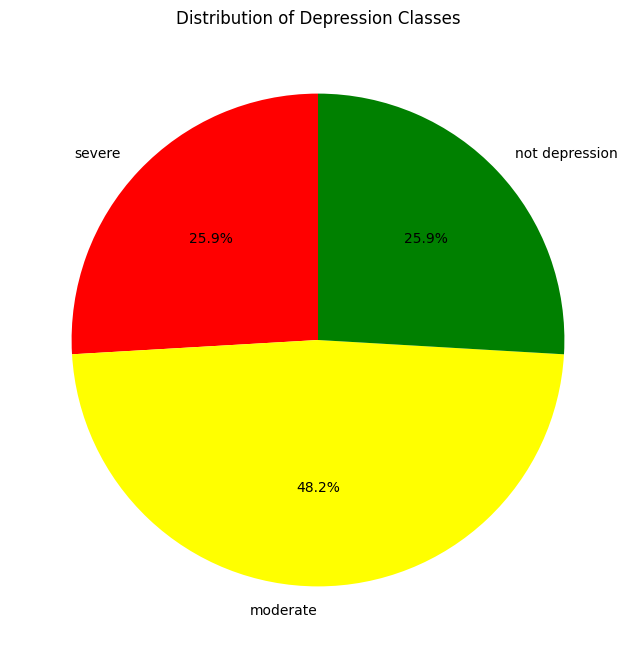

In [64]:
import matplotlib.pyplot as plt
class_labels = list(counter.keys())
class_counts = list(counter.values())
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow', 'green'])
plt.title('Distribution of Depression Classes')
plt.show()



Random Test cases


In [68]:
X_test = ["My friend cries a lot daily , she cant stop crying she says I do not want  to live , and should die as its not point living ,she was also taking antidepressant to cope up with life she did a lot for his boyfriend but in return she did not get love so she is very much sad "]
X_test = clean_data(X_test)
prediction = NB_classifier.predict(X_test)
print(prediction)

inside predict
S : 
friend cry lot daily cant stop cry say want live die point living also taking antidepressant cope life lot boyfriend return get love much sad
[['moderate', 'friend cry lot daily cant stop cry say want live die point living also taking antidepressant cope life lot boyfriend return get love much sad']]


In [67]:
X_test = ["Depression affects more than a person's mood. It can affect the way they act, and how well they do in school. It also can affect their energy, sleep, and eating. Depression can even contribute to physical symptoms, like headaches and stomachaches."]
X_test = clean_data(X_test)
prediction = NB_classifier.predict(X_test)
print(prediction)

inside predict
S : 
depression affect person mood affect way act well school also affect energy sleep eating depression even contribute physical symptom like headache stomachache
[['not depression', 'depression affect person mood affect way act well school also affect energy sleep eating depression even contribute physical symptom like headache stomachache']]


In [71]:
X_test = [" Using antidepressants has been a real support for me during tough times. When I started taking them, things got a bit challenging, but overall, they've been beneficial. I mean, technically, it's a part of dealing with depression. I read online that antidepressants can really assist those going through a rough patch in their mental health."]
X_test = clean_data(X_test)
prediction = NB_classifier.predict(X_test)
print(prediction)

inside predict
S : 
using antidepressant real support tough time started taking thing got bit challenging overall beneficial mean technically part dealing depression read online antidepressant really assist going rough patch mental health
[['severe', 'using antidepressant real support tough time started taking thing got bit challenging overall beneficial mean technically part dealing depression read online antidepressant really assist going rough patch mental health']]
